# Problem 1

In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
# dataset 4

n = 200
x_d4 = 3 * (np.random.rand(n, 4) - 0.5)
y_d4 = (2 * x_d4[:, 0] - 1 * x_d4[:,1] + 0.5 + 0.5 * np.random.randn(n)) > 0
y_d4 = 2 * y_d4 -1

## 1. Batch steepest gradient method.

In [3]:
p=5
ones_n = np.ones(n)
x_d4_ = np.c_[x_d4, ones_n]
w0=np.random.rand(p)

In [4]:
%%time
alpha=0.001
lamb = 0.1
w = w0.copy()
Js_grad=[]
J = ones_n @ np.log(1+np.exp(-y_d4*(x_d4_@w))) + lamb * w @ w
Js_grad.append(J)
for i in range(500):
    probs = 1/(1+np.exp(- y_d4 * (x_d4_ @ w)))
    dJ = ones_n @ (-y_d4 * x_d4_.T * (1-probs)).T + 2*lamb*w
    w -= alpha*dJ
    J = ones_n @ np.log(1+np.exp(-y_d4*(x_d4_@w))) + lamb * w @ w
    Js_grad.append(J)
y_pred = 2*((w@ x_d4_.T)>0)-1
accuracy = np.mean(y_pred==y_d4)
print(f'accuracy : {accuracy}')
print(f'min J(w) : {min(Js_grad):.4}')

accuracy : 0.905
min J(w) : 43.9
CPU times: user 18.8 ms, sys: 5.45 ms, total: 24.2 ms
Wall time: 10.3 ms


## 2. Newton based method

In [5]:
%%time
alpha = 0.001
lamb = 0.1
w = w0.copy()
Js_newton=[]
J = ones_n @ np.log(1+np.exp(-y_d4*(x_d4_@w))) + lamb * w @ w
Js_newton.append(J)
for i in range(500):
    probs = 1/(1+np.exp(- y_d4 * (x_d4_ @ w)))
    dJ = ones_n @ (-y_d4 * x_d4_.T * (1-probs)).T + 2*lamb*w
    H = np.mean([np.outer(x_d4_[i], x_d4_[i]) * probs[i] * (1-probs[i]) for i in range(n)], axis=0) + 2*lamb * np.eye(p)
    w -= alpha*np.linalg.inv(H) @ dJ
    J = ones_n @ np.log(1+np.exp(-y_d4*(x_d4_@w))) + lamb * w @ w
    Js_newton.append(J)
y_pred = 2*((w@ x_d4_.T)>0)-1
accuracy = np.mean(y_pred==y_d4)
print(f'accuracy : {accuracy}')
print(f'min J(w) : {min(Js_newton):.4}')

accuracy : 0.91
min J(w) : 42.71
CPU times: user 1.31 s, sys: 422 ms, total: 1.73 s
Wall time: 407 ms


## 3. Compare the performance of two optimization methods

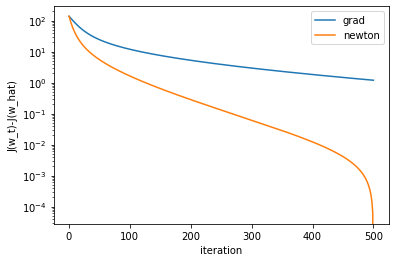

In [6]:
J_hat = min(*Js_grad, *Js_newton)
plt.plot(range(501), abs(Js_grad-J_hat), label='grad')
plt.plot(range(501), abs(Js_newton-J_hat), label='newton')
plt.legend()
# plt.xscale('log')
plt.xlabel('iteration')
plt.yscale('log')
plt.ylabel('J(w_t)-J(w_hat)')
plt.show()

## 4. Multiclass version

In [7]:
# dataset 5
n = 200
x_d5 = 3 * (np.random.rand(n, 4) - 0.5)
W = np.array([[ 2,  -1, 0.5,],
              [-3,   2,   1,],
              [ 1,   2,   3]])
y_d5 = np.argmax(np.dot(np.hstack([x_d5[:,:2], np.ones((n, 1))]), W.T)
                        + 0.5 * np.random.randn(n, 3), axis=1)

In [8]:
p = 5
c = 3
ones_n = np.ones(n)
x_d5_ = np.c_[x_d5, ones_n]
w0=np.random.rand(c,p)

### Simple Steepest Gradient Method

In [9]:
%%time
alpha = 0.001
lamb = 0.01
w = w0.copy()
accuracies=[]

Js_grad=[]

wc=w[y_d5]
maxwx = (w @ x_d5_.T).max(axis=0)
probs = (np.exp((wc * x_d5_).sum(axis=1) - maxwx)/np.exp(w @ x_d5_.T - maxwx).sum(axis=0))
J = -np.log(probs).sum()
Js_grad.append(J)
# counts = np.unique(y_d5, return_counts=True)[1]

for _ in range(100):
    wc=w[y_d5]
    maxwx = (w @ x_d5_.T).max(axis=0)
    probs = (np.exp((wc * x_d5_).sum(axis=1) - maxwx)/np.exp(w @ x_d5_.T - maxwx).sum(axis=0))
    dJ = (((probs-1) * x_d5_.T).T + (2 * lamb * wc))
    dj = np.zeros_like(w)
    for c, j in zip(y_d5, dJ):
        dj[c] += j
    w -= alpha*dj
    
    J = -np.log(probs).sum()
    Js_grad.append(J)
    y_pred = np.argmax(w @ x_d5_.T, axis=0)
    accuracy = np.mean(y_pred==y_d5)
    accuracies.append(accuracy)
print(f'accuracy : {max(accuracies)}')
print(f'Js_grad  : {min(Js_grad)}')

accuracy : 0.91
Js_grad  : 72.06652656644293
CPU times: user 19.1 ms, sys: 1.31 ms, total: 20.5 ms
Wall time: 20.1 ms


### Newton based method

In [10]:
%%time
alpha = 0.01
lamb = 0.01
w = w0.copy()
accuracies=[]
Js_newton=[]

wc=w[y_d5]
maxwx = (w @ x_d5_.T).max(axis=0)
probs = (np.exp((wc * x_d5_).sum(axis=1) - maxwx)/np.exp(w @ x_d5_.T - maxwx).sum(axis=0))
J = -np.log(probs).sum()
Js_newton.append(J)

for _ in range(100):
    wc=w[y_d5]
    maxwx = (w @ x_d5_.T).max(axis=0)
    probs = (np.exp((wc * x_d5_).sum(axis=1) - maxwx)/np.exp(w @ x_d5_.T - maxwx).sum(axis=0))
    dJ = (((probs-1) * x_d5_.T).T + (2 * lamb * wc))
    H = np.array([np.outer(x_d5_[i], x_d5_[i]) * probs[i] * (1-probs[i]) for i in range(n)]) + 2*lamb * np.eye(p)
    dj = np.zeros_like(w)
    for c, j, h in zip(y_d5, dJ, H):
        dj[c] += np.linalg.inv(h) @ j
    w -= alpha*dj
    
    wc=w[y_d5]
    maxwx = (w @ x_d5_.T).max(axis=0)
    probs = (np.exp((wc * x_d5_).sum(axis=1) - maxwx)/np.exp(w @ x_d5_.T - maxwx).sum(axis=0))
    J = -np.log(probs).sum()
    Js_newton.append(J)
    
    y_pred = np.argmax(w @ x_d5_.T, axis=0)
    accuracy = np.mean(y_pred==y_d5)
    accuracies.append(accuracy)
print(f'accuracy : {max(accuracies)}')
print(f'Js_newton  : {min(Js_newton)}')

accuracy : 0.87
Js_newton  : 126.41703739079801
CPU times: user 1.09 s, sys: 348 ms, total: 1.44 s
Wall time: 338 ms


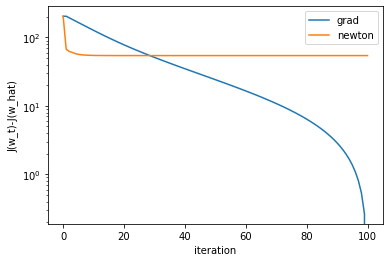

In [11]:
J_hat = min(*Js_grad, *Js_newton)
plt.plot(range(101), abs(Js_grad-J_hat), label='grad')
plt.plot(range(101), abs(Js_newton-J_hat), label='newton')
plt.legend()
# plt.xscale('log')
plt.xlabel('iteration')
plt.yscale('log')
plt.ylabel('J(w_t)-J(w_hat)')
plt.show()